## Produce Binomial Distribution Table and Graph

## In a first step we need to import the libraries 

In [ ]:
import math # Provides mathematical functions
import numpy as np # Provides calculating power for lists and matrices
import matplotlib.pyplot as plt # Lets you produces nice graphical output
import scipy.special # Provides binomial factors etc.
from matplotlib import style # Helps styling the graphs
from scipy.stats import binom # Calculates the binomial factors
from tabulate import tabulate # Allows to produce human readeable tables
from time import strftime # Converts a timestamp into a textstring

### Task 1: Perform the following calculations (or similar ones)

Help can be found at https://docs.python.org/3/library/functions.html for the basic functions and  https://docs.python.org/3/library/math.html as well as for advanced functions

1. $4+5=$
2. $3\cdot 7=$
3. $\frac{18}{3}=$
4. $7!=$
5. $\binom{10}{5}=$
6. $3.5^3=$|
7. $\sin(20^\circ)=$ (rounded to 3 s.f.) 

### Solution 1

In [ ]:
print(4+5)

print(3*5)

print(int(18/3)) 
# int() converts the number to an integer (whole number)

print(math.factorial(7)) 
# the factorial function is part of the math-library, i.e. why math.factorial()

print(scipy.special.comb(10,5,exact=True)) 
# The binomial factors are part of the scipy.special library. exact=True returns an integer.

print(3.5**3) 
# The notation for an exponent in Python is ** (in contrast to ^ on the calculator or in geogebra)

print(round(math.sin(math.radians(20)),3)) 
# The trigonometric functions take angles in radians. 
# The math.radians() function converts the angle in degrees into radians.
# The round(number, digits) rounds a floating point number to the given number of digits.

### Towards a fast production of pdf, cdf-tables and -graphs

In your group go through the code line by line and try to understand what it does. Run the code and try different parameters.

Enter the number of trials (n):  100
Enter the probability for success (p):  .4


╒═════╤═════════════╤═════════════╕
│ k   │ p(X=k)      │ p(X≤k)      │
╞═════╪═════════════╪═════════════╡
│ 0   │ 6.53319e-23 │ 6.53319e-23 │
├─────┼─────────────┼─────────────┤
│ 1   │ 4.35546e-21 │ 4.42079e-21 │
├─────┼─────────────┼─────────────┤
│ 2   │ 1.4373e-19  │ 1.48151e-19 │
├─────┼─────────────┼─────────────┤
│ 3   │ 3.13012e-18 │ 3.27827e-18 │
├─────┼─────────────┼─────────────┤
│ 4   │ 5.06036e-17 │ 5.38819e-17 │
├─────┼─────────────┼─────────────┤
│ 5   │ 6.47727e-16 │ 7.01609e-16 │
├─────┼─────────────┼─────────────┤
│ 6   │ 6.83711e-15 │ 7.53872e-15 │
├─────┼─────────────┼─────────────┤
│ 7   │ 6.12085e-14 │ 6.87472e-14 │
├─────┼─────────────┼─────────────┤
│ 8   │ 4.74365e-13 │ 5.43113e-13 │
├─────┼─────────────┼─────────────┤
│ 9   │ 3.23271e-12 │ 3.77583e-12 │
├─────┼─────────────┼─────────────┤
│ 10  │ 1.96118e-11 │ 2.33876e-11 │
├─────┼─────────────┼─────────────┤
│ 11  │ 1.06973e-10 │ 1.30361e-10 │
├─────┼─────────────┼─────────────┤
│ 12  │ 5.28924e-10 │ 6.5928

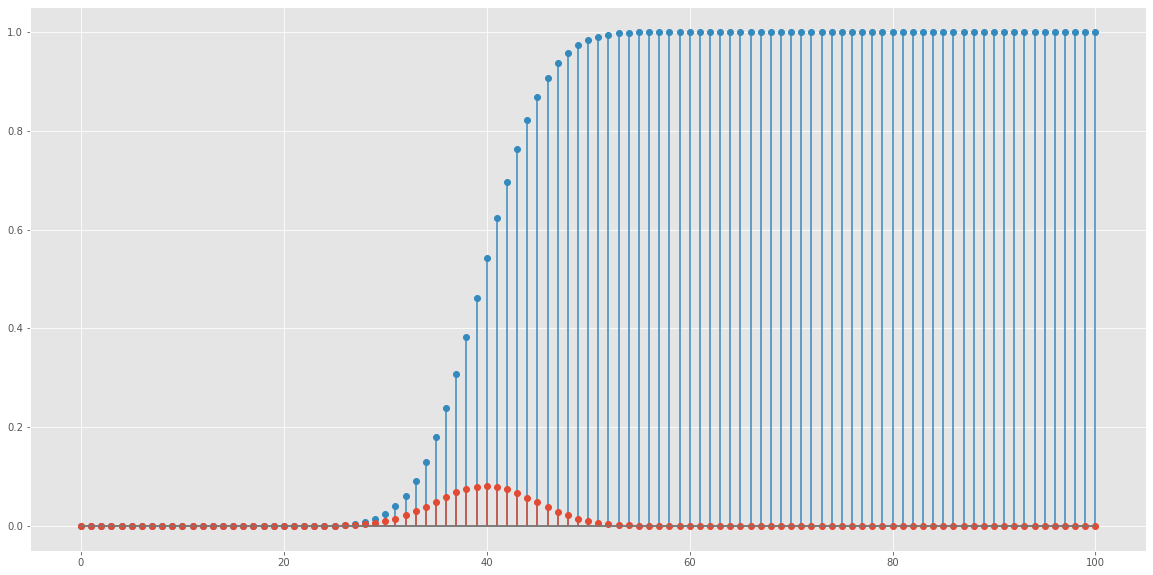

In [5]:
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# asking the user for the parameters
n= int(input("Enter the number of trials (n): ")) # number of trials
p= float(input("Enter the probability for success (p): "))  # probablity for success

# Generate an empty list a
a = []
# For all k a new line with k, pdf and cdf are added to the list
for k in range(0,n+1):
    a.append([k, binom.pmf(k,n,p), binom.cdf(k, n, p, loc=0)])

# Define the headers for the table
headers = ["k", "p(X=k)", "p(X≤k)"]

# Defining the parts of the table that is shown
table = tabulate(a, headers, tablefmt="fancy_grid", numalign="left")
# output
print(table)

# Convert table to a string which then can be written into a file
s_tab=str(table)


# Open file to write
f = open("binomial_data.txt", "w")
# Write the table into the file
f.write(s_tab)
# Close the file 
f.close()

# Generate three separate lists, one containing the k values (k_values), one for the pdf (dist) and one for the cdf (cdist)
k_values=list(range(n+1))
dist=[binom.pmf(k,n,p) for k in k_values] # PDF
cdist=[binom.cdf(k,n,p) for k in k_values] # CDF

# Plot the graph using the plt function stem (this kind of diagram with thin lines and a bullet on top)
plt.stem(k_values, cdist, linefmt='C1', markerfmt='C1o') #plot CDF
plt.stem(k_values, dist, linefmt='C0',markerfmt='C0o') # plot PDF
plt.savefig('pdf_cdf_plot.png') # save file as png-picture so you can use that later
plt.show() # show plot in notebook

In [2]:
n=int(input("How many different values are there in your probability distribution? "))
a = []
probsum = 0;
exp = 0;
exp2 = 0;
var=0;
for m in range(0,n):
   kvalue = int(input("Enter the k-value: "))
   kprob = float(input("Enter the corresponding probability: "))
   a.append([kvalue, kprob])
   probsum+=kprob
   exp+=kprob*kvalue
   exp2+=kprob*kvalue**2
var=exp2-exp**2
stdev=var**.5
print("Your input: "+str(a))
print("Total probability: "+str(round(probsum,3)))
print("Expected Value E(X): "+str(round(exp,3)))
print("Variance Var(X): "+str(round(var,3)))
print("Standard Deviation S(X): "+str(round(stdev,3)))

How many different values are there in your probability distribution?  6
Enter the k-value:  1
Enter the corresponding probability:  0.1666
Enter the k-value:  2
Enter the corresponding probability:  0.1666
Enter the k-value:  3
Enter the corresponding probability:  0.1666
Enter the k-value:  4
Enter the corresponding probability:  0.1666
Enter the k-value:  5
Enter the corresponding probability:  0.1666
Enter the k-value:  6
Enter the corresponding probability:  0.1666


Your input: [[1, 0.1666], [2, 0.1666], [3, 0.1666], [4, 0.1666], [5, 0.1666], [6, 0.1666]]
Total probability: 1.0
Expected Value E(X): 3.499
Variance Var(X): 2.92
Standard Deviation S(X): 1.709
